In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Criando os dados

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


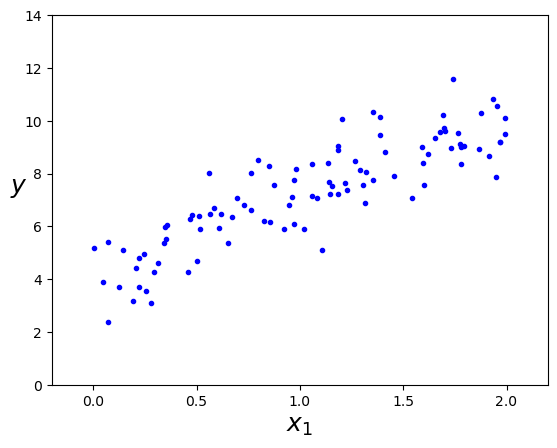

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.2, 2.2, 0, 14])
plt.show()

# Criando o modelo linha a linha

Como visto no segundo notebook do capítulo, utilizaremos os metodos de equação normal e gradiente descendente em nossa classe. Ressaltando que o método default utilizado na biblioteca scikit-learn é o metódo da equação normal.

## Equação normal

In [8]:
X.shape

(100, 1)

In [9]:
X_b = np.c_[np.ones((X.shape[0], 1)), X] # Adiciona o bias

In [11]:
X_b[:5]

array([[1.        , 1.41016647],
       [1.        , 0.28196268],
       [1.        , 1.8768589 ],
       [1.        , 0.56178004],
       [1.        , 1.54077881]])

In [12]:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta

array([[4.22322767],
       [2.94569976]])

## Gradiente Descendente

Theta inicial: [[1.13821451]
 [0.59568735]]
Theta final: [[4.22322767]
 [2.94569976]]


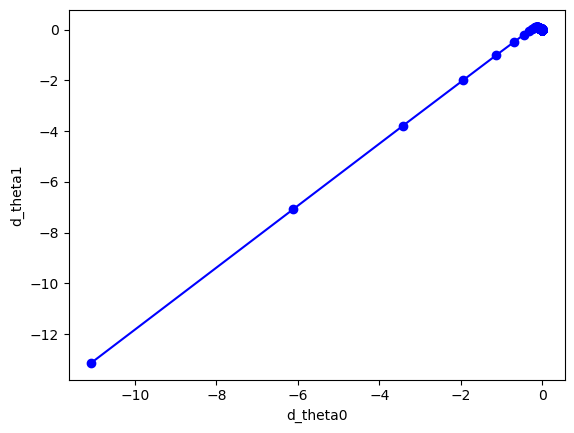

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona o bias
n_registros, n_features = X_b.shape

theta = np.random.randn(n_features, 1)  # Inicialização aleatória
print(f'Theta inicial: {theta}')

list_gradients = []
for _ in range(n_iterations):
    gradients = 2/n_registros * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    list_gradients.append(gradients)


list_gradients = np.array(list_gradients).reshape(1000,2)
plt.plot(list_gradients[:,0],list_gradients[:,1], 'b-o')
plt.xlabel('d_theta0')
plt.ylabel('d_theta1')
print(f'Theta final: {theta}')

# Criando Classe Final

In [27]:
import numpy as np

class RegressaoLinear:
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='gradient_descent'):
        self.theta = None
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Adiciona o bias
        n_registros, n_features = X_b.shape
        if self.method == 'normal_equation':
            self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        elif self.method == 'gradient_descent':
            self.theta = np.random.randn(n_features, 1)  # Inicialização aleatória
            for _ in range(self.n_iterations):
                gradients = 2 / n_registros * X_b.T.dot(X_b.dot(self.theta) - y)
                self.theta = self.theta - self.learning_rate * gradients
                
        self.coef_ = self.theta[1:] # Coeficientes da regressão
        self.intercept_ = self.theta[0] # Intercepto da regressão


    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.theta)

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"learning_rate": self.learning_rate, "n_iterations": self.n_iterations, "method": self.method}


## Testando a classe

### Gradiente descendente

In [30]:
gd_reg = RegressaoLinear()
gd_reg.set_params(learning_rate=0.1, n_iterations=1000, method='gradient_descent')
gd_reg.fit(X, y)

In [42]:
gd_reg.theta

array([[4.22322767],
       [2.94569976]])

In [31]:
gd_reg.intercept_, gd_reg.coef_

(array([4.22322767]), array([[2.94569976]]))

In [18]:
X_new = np.array([min(X), max(X)]) # prevendo para cada o valor min e máx de X
X_new

array([[0.00577811],
       [1.99448328]])

In [19]:
y_predict = gd_reg.predict(X_new)
y_predict

array([[ 4.24024825],
       [10.09837659]])

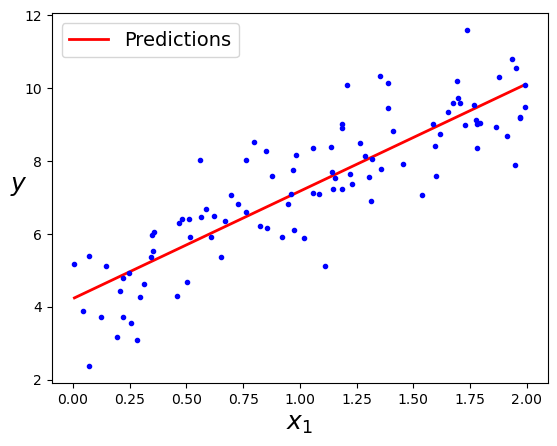

In [20]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.show()

### Equação Normal

In [33]:
eq_reg = RegressaoLinear(learning_rate=0.1, n_iterations=1000, method='normal_equation')
eq_reg.fit(X, y)

In [36]:
eq_reg.intercept_[0]

4.22322766581673

In [38]:
eq_reg.coef_

array([[2.94569976]])

In [34]:
eq_reg.intercept_, eq_reg.coef_

(array([4.22322767]), array([[2.94569976]]))

In [22]:
X_new = np.array([min(X), max(X)]) # prevendo para cada o valor min e máx de X
y_predict = eq_reg.predict(X_new)

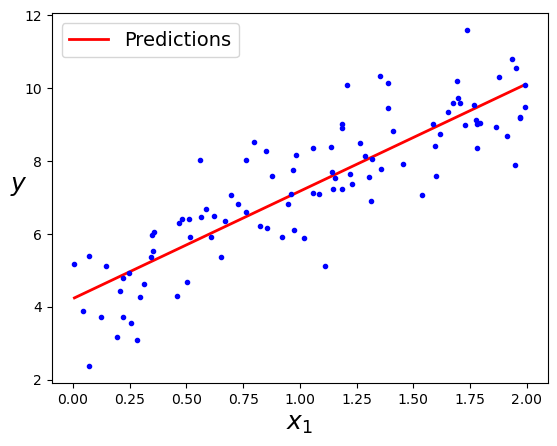

In [23]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.show()